# Instantaneous Time-Frequency Analysis in Time Series

Time series analysis is a fundamental aspect of various fields, including finance, communications, neuroscience, and many others. Understanding the underlying dynamics of non-stationary time series data is crucial for extracting meaningful features and uncovering hidden patterns. One powerful technique for achieving this is through instantaneous time-frequency analysis, which provides valuable insights into the time-varying frequency content of a signal.

**The Importance of Instantaneous Time-Frequency Analysis**

Instantaneous time-frequency analysis, such as computing the spectrogram, plays a pivotal role in feature engineering and data science tasks involving non-stationary time series. Here are some key reasons why it is an essential tool in your analytical arsenal:

1. **Capturing Dynamic Frequency Changes**: Unlike traditional frequency analysis techniques, instantaneous time-frequency analysis captures the frequency content of a signal as it evolves over time. This allows us to observe changes in frequency components, identify transients, track modulations, and detect patterns that might not be apparent in the time or frequency domain alone.

2. **Unveiling Non-Stationarity**: Non-stationary time series data often exhibit variations in frequency content over different time intervals. By visualizing the time-frequency representation, we can gain insights into the evolution of the signal's spectral characteristics, which is particularly useful when dealing with phenomena that exhibit frequency modulations, chirps, or time-varying dynamics.

3. **Feature Extraction and Pattern Recognition**: Instantaneous time-frequency analysis provides a rich source of features that can enhance machine learning models' performance for classification, anomaly detection, and predictive modeling tasks.

4. **Signal Processing Applications**: Instantaneous time-frequency analysis finds applications in various signal processing tasks. For instance, it is widely used in audio and speech processing, where it helps with speech recognition, music analysis, and noise removal. Additionally, it assists in analyzing physiological signals, radar processing, and communications, among others, where it enables the extraction of critical information embedded in the time-varying frequency content.

In summary, instantaneous time-frequency analysis is a powerful tool for uncovering the time-varying frequency content of non-stationary time series data. By leveraging this technique, we can gain valuable insights into the dynamics of the underlying processes, improve feature engineering, and enhance our data science workflows. In the following sections, we will explore practical examples of computing the instantaneous time-frequency representation and demonstrate its significance in analyzing non-stationary time series data.


In this notebook, we will be exploring the functions from this repository that compute instantaneous frequency and plot spectrogram. We will showcase comprehensive plots that demonstrate how the analysis works, providing valuable insights for your own data science projects.

This notebook was inspired in the [instfreq](https://www.mathworks.com/help/signal/ref/instfreq.html) function from Matlab

In [1]:
#Import packages
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
sys.path.append(os.path.dirname(os.getcwd()))
from signal_analysis import inst_freq, plot_spectrogram, plotly_spectrogram
from scipy import signal

### Sine Waves

The next code cell generates a sinusoidal signal with a frequency of 200 Hz. The signal is generated for a duration of 0.3 seconds and sampled at a frequency of 1000 Hz. Random noise is added to the signal using np.random.randn() function, and the amplitude of the noise is scaled by dividing it by 4. The resulting signal is stored in the variable x1.

In [2]:
fs1 = 1000  # Sampling frequency in Hz
# Generating a time vector from 0 to 0.3 seconds with a step size of 1/fs1
t = np.arange(0, 0.3, 1/fs1)
# Generating a sinusoidal signal with frequency 200 Hz and adding random noise
x1 = np.sin(2*np.pi*200*t) + np.random.randn(len(t))/4

Plot the spectrogram with the estimated instantaneous frequency highlighted (function `plot_spectrogram` from repository)

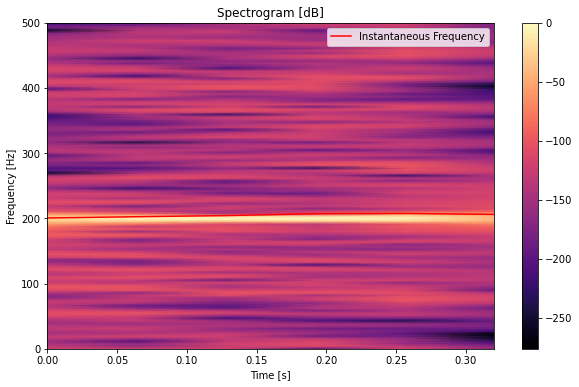

In [3]:
fig1 = plot_spectrogram(x1,fs1,display_inst_freq=True)

In the preceding plot, the estimated instantaneous frequency is represented by the red curve. It is apparent that this curve tends to align with the frequency exhibiting the highest energy, which in this case is 200 Hz. However, the presence of noise introduces slight distortions in the curve.

The following code segment generates a test signal by summing two sinusoidal signals of different frequencies. The signal is generated for a duration of 1 second, sampled at a frequency of 2000 Hz. The resulting signal is stored in the variable x2.

In [18]:
fs2 = 2000  # Sampling frequency in Hz
# Generating a time vector from 0 to 1 second with a step size of 1/fs2
t = np.arange(0, 1, 1/fs2)
# Generating a test signal by summing two sinusoidal signals
x2 = np.sin(2 * np.pi * 500 * t) + np.sin(2 * np.pi * 100 * t)

Plot the spectrogram with the estimated instantaneous frequency highlighted (function `plot_spectrogram` from repository)

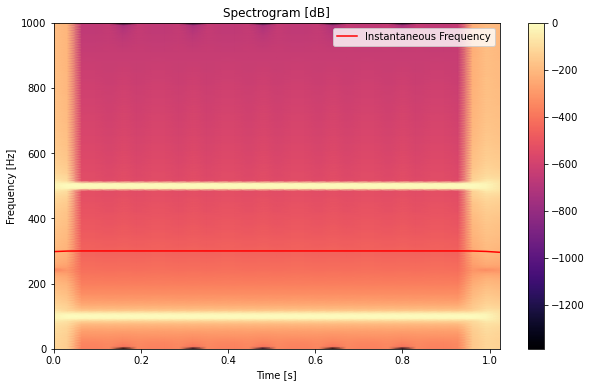

In [19]:
fig2 = plot_spectrogram(x2,fs2,display_inst_freq=True)

In the previous plot, it is evident that the estimated frequency remains consistently around 300 Hz for the entire signal. This frequency corresponds to the mean of the two signals that were added together (one with 100 Hz and the other with 500 Hz).

Furthermore, you can directly obtain the data points for the instantaneous frequency using the `instfreq` function from this repository.

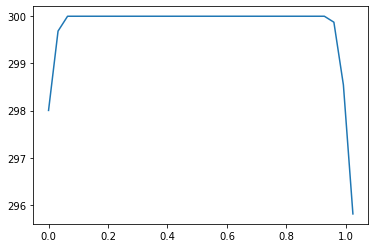

In [22]:
t, instfreq = inst_freq(x2,fs2)
plt.plot(t,instfreq)

### Chirp Signals

Similarly to the previous cases involving sine waves, let's visualize the spectrogram plots for Chirp Signals, highlighting the estimated instantaneous frequency. As with the previous cases, note that the instantaneous frequency is represented by a red curve that tends to track the frequency region with the highest energy.

In this code, a linear chirp signal is generated using the signal.chirp() function from the scipy library. The chirp signal starts at a frequency of 1000 Hz (f0), ends at a frequency of 500 Hz (f1), and its duration is 2 seconds (t1). The resulting signal is sampled at a frequency of 7200 Hz (fs3) and stored in the variable x3.

In [6]:
fs3 = 7200  # Sampling frequency in Hz
T = 4  # Duration of the chirp signal in seconds
# Generating a time vector from 0 to T seconds with a step size of 1/fs3
t = np.arange(0, int(T*fs3)) / fs3
# Generating a linear chirp signal using the signal.chirp() function
x3 = signal.chirp(t, f0=1000, f1=500, t1=2, method='linear')

Plot the spectrogram with the estimated instantaneous frequency highlighted (function `plot_spectrogram` from repository)

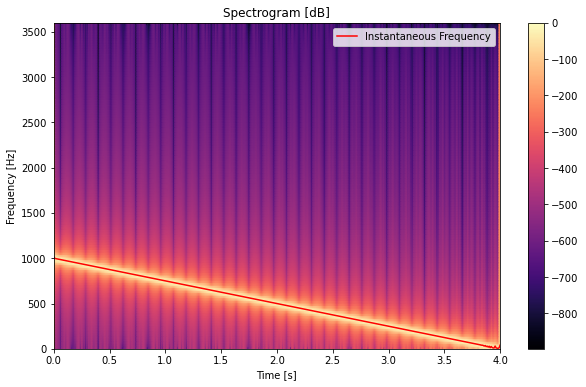

In [7]:
fig3 = plot_spectrogram(x3,fs3,display_inst_freq=True)

In this code, a quadratic chirp signal is generated using the signal.chirp() function from the scipy library. The chirp signal starts at a frequency of 1500 Hz (f0), ends at a frequency of 250 Hz (f1), and its duration is 40 seconds (t1). The resulting signal is sampled at a frequency of 7200 Hz (fs4) and stored in the variable x4.

In [8]:
fs4 = 7200  # Sampling frequency in Hz
T = 40  # Duration of the chirp signal in seconds
# Generating a time vector from 0 to T seconds with a step size of 1/fs4
t = np.arange(0, int(T*fs4)) / fs4
# Generating a quadratic chirp signal using the signal.chirp() function
x4 = signal.chirp(t, f0=1500, f1=250, t1=T, method='quadratic')

Plot the spectrogram with the estimated instantaneous frequency highlighted (function `plot_spectrogram` from repository)

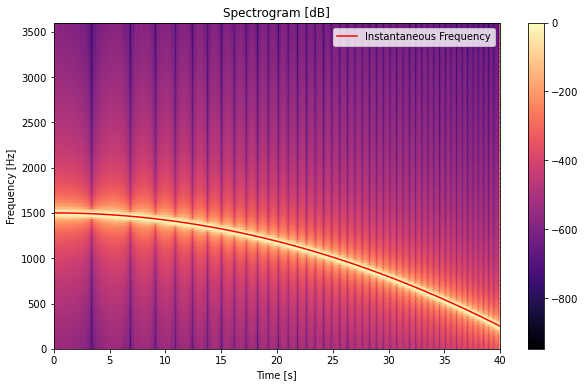

In [9]:
fig4 = plot_spectrogram(x4,fs4,display_inst_freq=True)

In this code, a hyperbolic chirp signal is generated using the signal.chirp() function from the scipy library. The chirp signal starts at a frequency of 2000 Hz (f0), ends at a frequency of 500 Hz (f1), and its duration is 1.5 seconds (t1). The resulting signal is sampled at a frequency of 7200 Hz (fs5) and stored in the variable x5.

In [10]:
fs5 = 7200  # Sampling frequency in Hz
T = 4  # Duration of the chirp signal in seconds
# Generating a time vector from 0 to T seconds with a step size of 1/fs5
t = np.arange(0, int(T*fs5)) / fs5
# Generating a hyperbolic chirp signal using the signal.chirp() function
x5 = signal.chirp(t, f0=2000, f1=500, t1=1.5, method='hyperbolic')

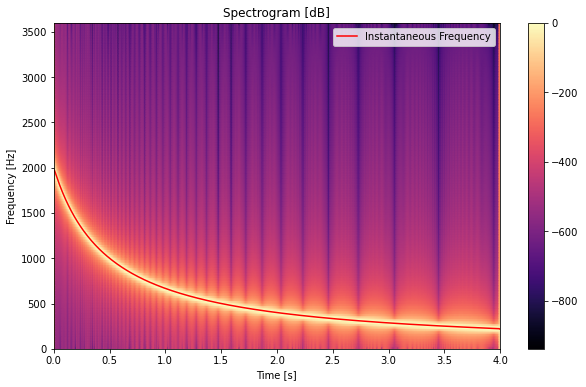

In [11]:
fig5 = plot_spectrogram(x5,fs5,display_inst_freq=True)

In this code, a concatenated chirp signal with linear frequency modulation is generated. The chirp signal consists of multiple segments with different frequency intervals. The `signal.chirp()` function from the `scipy` library is used to generate each segment of the chirp signal. Each segment corresponds to a specific time interval, starting from time 0 and ending at time T.

The chirp signal is divided into four segments based on time intervals. The initial frequency of the chirp signal is 500 Hz (`f0`), and it linearly increases to 2000 Hz (`f1`) over a duration of 10 seconds (`T`). The time segments for the different frequency intervals are defined as follows:

- Segment 1: Starts at time 0 and ends at 3.33 seconds (T/3).
- Segment 2: Starts at 3.33 seconds (T/3) and ends at 6.67 seconds (2T/3).
- Segment 3: Starts at 6.67 seconds (2T/3) and ends at 10 seconds (T).

The frequencies corresponding to these time segments are defined as:
- Segment 1: Maintains a frequency of `f0` (500 Hz).
- Segment 2: Doubles the frequency to 2 * `f0` (1000 Hz).
- Segment 3: Doubles the frequency again to 2 * `f1` (4000 Hz).
- The final segment continues with a frequency of `f1` (2000 Hz).

Each segment is generated using the `signal.chirp()` function with the specified frequency range and time duration. The resulting segments are then concatenated using the `np.concatenate()` function. The final signal, sampled at a frequency of 7200 Hz (`fs6`), is stored in the variable `x6`.


In [12]:
fs6 = 7200  # Sampling frequency in Hz
T = 10  # Duration of the chirp signal in seconds
# Generating a time vector from 0 to T seconds with a step size of 1/fs6
t = np.arange(0, int(T*fs6)) / fs6
f0 = 500  # Starting frequency of the chirp in Hz
f1 = 2000  # Ending frequency of the chirp in Hz
# Time segments for different frequency intervals
t_segments = [0, T/3, 2*T/3, T]
# Frequencies for different time segments
frequencies = [f0, f0*2, f1*2, f1]
# Generating a concatenated chirp signal with linear frequency modulation
x6 = np.concatenate([signal.chirp(t[(t >= t_segments[i]) & (t < t_segments[i+1])],
                                 f0=frequencies[i], f1=frequencies[i+1],
                                 t1=t_segments[i+1]-t_segments[i], method='linear')
                    for i in range(len(t_segments)-1)])

Plot the spectrogram with the estimated instantaneous frequency highlighted (function `plot_spectrogram` from repository)

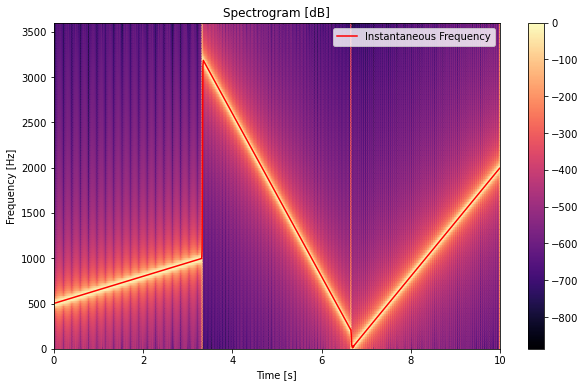

In [13]:
fig6 = plot_spectrogram(x6,fs6,display_inst_freq=True)

In this code, a chirp signal is generated using the signal.chirp() function from the scipy library. The chirp signal starts at a frequency of 100 Hz (f0), ends at a frequency of 400 Hz (f1), and its duration is 40 seconds (t1). The resulting signal is sampled at a frequency of 1000 Hz (fs7) and stored in the variable x7.

A white noise signal is also generated using np.random.normal() function with a specified noise power. The noise is added to the chirp signal by element-wise addition, and the resulting signal is stored back in the variable x7.

In [14]:
# Parameters
fs7 = 1000  # Sampling frequency in Hz
T = 40  # Duration of the signal in seconds
# Generating a time vector from 0 to T seconds with a step size of 1/fs7
t = np.arange(0, int(T*fs7)) / fs7
# Generate the chirp signal
x7 = signal.chirp(t, f0=100, f1=400, t1=T, method='quadratic')
# Generate white noise signal
noise_power = 0.1  # Adjust the noise power as needed
noise = np.random.normal(scale=np.sqrt(noise_power), size=len(x7))
# Add noise to the signal
x7 = x7 + noise

Plot the spectrogram with the estimated instantaneous frequency highlighted (function `plot_spectrogram` from repository)

It is important to consider that noisy signals can introduce errors in the estimation of instantaneous frequency, as demonstrated in the following plot for this chirp signal. In the red plot, we can observe that the red line is distorted and does not precisely follow the quadratic relation from 100 Hz to 400 Hz, indicating the impact of noise on the estimation process.

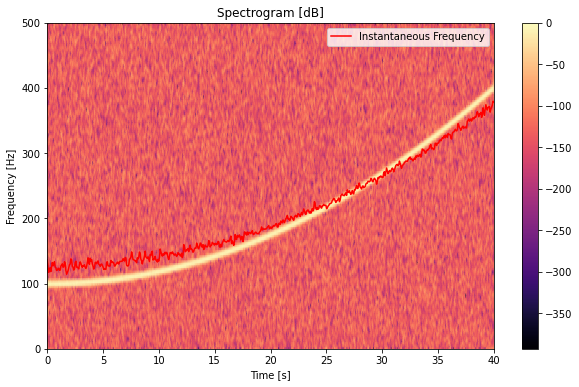

In [15]:
fig7 = plot_spectrogram(x7,fs7,display_inst_freq=True)

Additionally, the spectrogram can be plotted using the visualization functionality provided by Scipy instead of Matplotlib. This approach offers a more interactive and visually appealing analysis experience. To generate the spectrogram plot, you can utilize the `plotly_spectrogram` function from this repository.

In [16]:
plotly_spectrogram(x7,fs7,display_inst_freq=True)